In [0]:
import pandas as pd 
import numpy as np
import string 
import re
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import operator
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In Part 1 of the project, the team identified the important topics for MIE1624 in order to design the course curriculum.

# 1.0 Course Data Upload

The first dataset used for part 1 is the dataset from 2016 that contains data sience related courses from different universities and colleges from western countries.

In [0]:
df = pd.read_csv('data science courses 2016.csv',low_memory=False)

In [0]:
df.head()

,Type of course,Higher Education/Professional Development,Course Title,Course link,Course Provider,Country,"Primary location (City, Online, Blended)",Language,Length of course,Qualification or accreditation,"Study mode (FT, PT, Flexible)","Department(s), Faculty",Core modules/units/course content,Data not available,"Techniques, tools, programming languages",Placement,Total cost EU (starting 2016),Cost non-EU (starting 2016),Subsidised Learning,Target audience,"Listed, searchable?","search term, tag",Entry requirements?,Frequency of course,Start date/time,Year established,Industry partners
0,Masters,Higher Education,Data Studies,http://www.donau-uni.ac.at/en/studium/data-stu...,Danube University Krems,Austria,Campus Krems,"English, native language",5 semesters,Master of Science,"FT, PT","Arts, Culture and Building","Data Literacy, Digital Methods, Dat Imagery, D...",Data not available,Data not available,Data not available,"EUR 14,850.00",Data not available,Data not available,"Journalists, Engineers, Developers, Digital Hu...",Data not available,"data, humanities",http://www.donau-uni.ac.at/en/studium/data-stu...,Annual,autumn,Data not available,No evidence of industry partners
1,Academic Expert,Higher Education,Data Studies,http://www.donau-uni.ac.at/en/studium/data-stu...,Danube University Krems,Austria,Campus Krems,"English, native language",3 semesters,"Akademische/r Experte/in, AE","FT, PT",Data not available,"Data Literacy, Digital Methods, Dat Imagery, D...",Data not available,Data not available,Data not available,"EUR 9,850.00",Data not available,Data not available,"Journalists, Engineers, Developers, Digital Hu...",Data not available,"data, humanities",NaN,Annual,autumn,Data not available,No evidence of industry partners
2,Certificate,Higher Education,Data Studies,http://www.donau-uni.ac.at/en/studium/data-stu...,Danube University Krems,Austria,Campus Krems,"English, native language",3 semesters,Certified Programme,"FT, PT",Data not available,"Data Literacy, Digital Methods, Dat Imagery, D...",Data not available,Data not available,Data not available,"EUR 5,850.00",Data not available,Data not available,"Journalists, Engineers, Developers, Digital Hu...",Data not available,"data, humanities",NaN,Annual,autumn,Data not available,No evidence of industry partners
3,Bachelors,Higher Education,Wirtschaftsinformatik (Business Informatics),http://www.jku.at/content/e262/e242/e2380/e2268/,Johannes Kepler Universitaet Linz,Austria,Linz,Native language,3 years,Bachelor of Science,FT,Data not available,"Grundlagen der Wirtschaftsinformatik, Grundlag...","Typisch: Algorithmen and Datenstrukturen, Proz...",Data not available,Data not available,Data not available,Data not available,Data not available,Graduates going into industry and business wit...,http://www.studienwahl.at,"computing, data",NaN,Annual,autumn,Data not available,No evidence of industry partners
4,Masters,Higher Education,Wirtschaftsinformatik (Business Informatics),http://www.jku.at/content/e262/e242/e2380/e2294,Johannes Kepler Universitaet Linz,Austria,Linz,Native language,2 years,Master of Science,FT,Data not available,Pflichtprogramme: Spezialkompetenz Wirtschafts...,Spezialkompetenz Wirtschaftsinformatik Spezial...,Data not available,Data not available,Information,Information,Data not available,Data not available,http://www.studienwahl.at,"computing, data",NaN,Annual,autumn,Data not available,No evidence of industry partners


# 2.0 Course Data Preprocessing

The data preprocessing generally preprocesses the text from the column named "Core modules/units/course content" since this column contains all the information about course topics for each course which are useful references.The preprocessed column was then assigned with a new column name: 'clean_description'.

In [0]:
#this function modify the text to lower case version
def lowercase(text):
  return text.lower()

In [0]:
#upload and read the new stop_words file from quercus
#Here, I created a new list of stop words by adding more words from the poseted stop word file on quercus
f = open("stop_words.txt", "r")
extra_stop_word=[]
lines=f.read().splitlines()
for i in lines:
  extra_stop_word.append(i)

In [0]:
#search for words that are not in the original stop words list from NLTK
#add those words to the list
stop_words=list(stopwords.words('english'))
for i in extra_stop_word:
  if i not in stop_words:
    stop_words.append(i)

In [0]:
#this function removes the stop words from the text
def remove_stopwords(text):
  s1 = ' '
  #corpus_clean = []
  tokenizer = RegexpTokenizer(r'\w+')
  token= tokenizer.tokenize(text)
  filtered_sentence = [w for w in token if not w in stop_words] 
  
  return s1.join(filtered_sentence)

In [0]:
#this function removes the punctuation
def remove_punctuation(text):
  return text.translate(str.maketrans('', '', string.punctuation))

In [0]:
#this function convert the words in the text into its original forms
def lemmitizer(text):
  s1 = ' '
  tokenizer = RegexpTokenizer(r'\w+')
  token= tokenizer.tokenize(text)
  wnLemm = WordNetLemmatizer()
  updated_sentence=[]
  for i in token:
    updated_sentence.append(wnLemm.lemmatize(i,'v'))
  return s1.join(updated_sentence)

In [0]:
#this function removes the numerical values from the text
def remove_num(text):
  s1 = ' '
  tokenizer = RegexpTokenizer(r'\w+')
  token= tokenizer.tokenize(text)
  
  updated_sentence=[]
  for i in token:

    clean_word = ''.join([k for k in i if not k.isdigit()])
    updated_sentence.append(clean_word)
  return s1.join(updated_sentence)

In [0]:
#this function combines all the previous preprocessing functions and implement the preprocessing operations
def preprocessing(text_df):
  text=list(text_df.loc[:,'Core modules/units/course content'].values)
  new_text=[]
  for i in text:
    if type(i)!=str:
      i=str(i)
    step1=lowercase(i)
    step2=remove_stopwords(step1)
    step3=remove_punctuation(step2)
    step4=lemmitizer(step3)
    step5=remove_num(step4)
    step6=remove_stopwords(step5)
    new_text.append(step6)
  new_text_df=pd.DataFrame(new_text)
  #text_df.drop('text',1)
  text_df.insert(2, 'clean_description', new_text_df)
  return text_df

In [0]:
clean_df=preprocessing(df)

In [0]:
clean_df

,Type of course,Higher Education/Professional Development,clean_description,Course Title,Course link,Course Provider,Country,"Primary location (City, Online, Blended)",Language,Length of course,Qualification or accreditation,"Study mode (FT, PT, Flexible)","Department(s), Faculty",Core modules/units/course content,Data not available,"Techniques, tools, programming languages",Placement,Total cost EU (starting 2016),Cost non-EU (starting 2016),Subsidised Learning,Target audience,"Listed, searchable?","search term, tag",Entry requirements?,Frequency of course,Start date/time,Year established,Industry partners
0,Masters,Higher Education,literacy digital methods dat imagery digital h...,Data Studies,http://www.donau-uni.ac.at/en/studium/data-stu...,Danube University Krems,Austria,Campus Krems,"English, native language",5 semesters,Master of Science,"FT, PT","Arts, Culture and Building","Data Literacy, Digital Methods, Dat Imagery, D...",Data not available,Data not available,Data not available,"EUR 14,850.00",Data not available,Data not available,"Journalists, Engineers, Developers, Digital Hu...",Data not available,"data, humanities",http://www.donau-uni.ac.at/en/studium/data-stu...,Annual,autumn,Data not available,No evidence of industry partners
1,Academic Expert,Higher Education,literacy digital methods dat imagery digital h...,Data Studies,http://www.donau-uni.ac.at/en/studium/data-stu...,Danube University Krems,Austria,Campus Krems,"English, native language",3 semesters,"Akademische/r Experte/in, AE","FT, PT",Data not available,"Data Literacy, Digital Methods, Dat Imagery, D...",Data not available,Data not available,Data not available,"EUR 9,850.00",Data not available,Data not available,"Journalists, Engineers, Developers, Digital Hu...",Data not available,"data, humanities",NaN,Annual,autumn,Data not available,No evidence of industry partners
2,Certificate,Higher Education,literacy digital methods dat imagery digital h...,Data Studies,http://www.donau-uni.ac.at/en/studium/data-stu...,Danube University Krems,Austria,Campus Krems,"English, native language",3 semesters,Certified Programme,"FT, PT",Data not available,"Data Literacy, Digital Methods, Dat Imagery, D...",Data not available,Data not available,Data not available,"EUR 5,850.00",Data not available,Data not available,"Journalists, Engineers, Developers, Digital Hu...",Data not available,"data, humanities",NaN,Annual,autumn,Data not available,No evidence of industry partners
3,Bachelors,Higher Education,grundlagen der wirtschaftsinformatik grundlage...,Wirtschaftsinformatik (Business Informatics),http://www.jku.at/content/e262/e242/e2380/e2268/,Johannes Kepler Universitaet Linz,Austria,Linz,Native language,3 years,Bachelor of Science,FT,Data not available,"Grundlagen der Wirtschaftsinformatik, Grundlag...","Typisch: Algorithmen and Datenstrukturen, Proz...",Data not available,Data not available,Data not available,Data not available,Data not available,Graduates going into industry and business wit...,http://www.studienwahl.at,"computing, data",NaN,Annual,autumn,Data not available,No evidence of industry partners
4,Masters,Higher Education,pflichtprogramme spezialkompetenz wirtschaftsi...,Wirtschaftsinformatik (Business Informatics),http://www.jku.at/content/e262/e242/e2380/e2294,Johannes Kepler Universitaet Linz,Austria,Linz,Native language,2 years,Master of Science,FT,Data not available,Pflichtprogramme: Spezialkompetenz Wirtschafts...,Spezialkompetenz Wirtschaftsinformatik Spezial...,Data not available,Data not available,Information,Information,Data not available,Data not available,http://www.studienwahl.at,"computing, data",NaN,Annual,autumn,Data not available,No evidence of industry partners
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,Short Course,Professional Development,mapr stream mapr stream architecture producers...,DEV 3500 � Real-time Stream Processing with MapR,https://www.mapr.com/serv

# 3.0 Course Data Feature Generation

For feature, I used Term frequency–Inverse document frequency(TFIDF) for each word from the cleaned course topic, namely 'course_description'. This is because TFIDF not only consider the length of the text by using term frequency but also include the amount of information that the words hold by using incerse document frequency.

In [0]:
vectorizer = TfidfVectorizer(analyzer='word',  use_idf=True, smooth_idf=True, norm=None)
course_TFIDF = vectorizer.fit_transform(list(clean_df.clean_description)).toarray()
course_feature_TFIDF=vectorizer.get_feature_names() 

In [0]:
#a list of words that the TFIDFs are calculated on
course_feature_TFIDF

['ab',
 'abstract',
 'academic',
 'accelerator',
 'access',
 'accessibility',
 'accompany',
 'account',
 'accuracy',
 'accurate',
 'accurately',
 'achievement',
 'acquire',
 'acquisition',
 'action',
 'active',
 'activity',
 'actors',
 'acumen',
 'ad',
 'adaptive',
 'add',
 'additional',
 'address',
 'adequate',
 'administer',
 'administration',
 'administrative',
 'adopt',
 'adoption',
 'advance',
 'advantage',
 'advertise',
 'advice',
 'aerials',
 'agent',
 'agents',
 'aggregate',
 'aggregation',
 'aggregations',
 'agile',
 'agriculture',
 'ai',
 'aid',
 'aktuellen',
 'alarm',
 'algebra',
 'algebraic',
 'algorithm',
 'algorithmic',
 'algorithmics',
 'algorithms',
 'allocate',
 'alternative',
 'amazon',
 'ambari',
 'ambient',
 'amsterdam',
 'analyse',
 'analyst',
 'analytic',
 'analytical',
 'analyze',
 'anatomy',
 'android',
 'anomalies',
 'anomaly',
 'anonymity',
 'answer',
 'anti',
 'apache',
 'api',
 'apis',
 'app',
 'application',
 'apply',
 'appraisal',
 'approach',
 'appropriat

In [0]:
#this function generate a new dataframe that contains the TFIDF features
def feature_dataframe(feature_values,feature_list):
  df=pd.DataFrame(feature_values)
  df.columns=feature_list
  return df

In [0]:
# a dataframe of TFIDF was obtained
course_TFIDF_featuredata=feature_dataframe(course_TFIDF,course_feature_TFIDF)
course_TFIDF_featuredata

,ab,abstract,academic,accelerator,access,accessibility,accompany,account,accuracy,accurate,accurately,achievement,acquire,acquisition,action,active,activity,actors,acumen,ad,adaptive,add,additional,address,adequate,administer,administration,administrative,adopt,adoption,advance,advantage,advertise,advice,aerials,agent,agents,aggregate,aggregation,aggregations,...,visualizations,visualize,visually,vizualisation,voice,volumes,wahlfach,warehouse,ways,web,webmining,webscraping,week,weeks,weight,whilst,wide,wild,willingness,windows,wireless,wirtschaftsinformatik,wirtschaftswissenschaften,witch,word,workbook,workbooks,workflow,workflows,workshop,workshops,wrangle,wrap,writablecomparables,wrong,xml,yarn,year,yield,zookeeper
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,6.431536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.104284,6.431536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.693867,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.052142,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.639777,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000

# 4.0 K-means Implementation on Course Dataset

In this section, I used K-means algorithm to classified the samples with TFIDF features from 'course_description'. In general, each sample was represented as a vector of TFIDF and the K-means classifier put samples with similar TFIDFs into groups which means the samples within the same group has similar word distributions. The entire dataset was divided into 15 groups based on the rule of thumb. The purpose of grouping is to find which courses have similar course topics. After grouping was done, the top 20 words with the highest total TFIDFs calculated based on all group memebers were selected as the representative topics(key words) of each individual group of courses. These topics or key words were then be used as references for MIE1624 topic selection.

In [0]:
kmeans = KMeans(init='k-means++',n_clusters=15, random_state=0).fit(course_TFIDF_featuredata)

In [0]:
#this returns the list of group label for each sample
#cluster_results=kmeans.fit_predict(job_TFIDF_featuredata)
cluster_results=kmeans.labels_

In [0]:
cluster_labels  = pd.Series(cluster_results,name='Cluster') #returns all group number assigned to each word 
cluster_labels

0       5
1       5
2       5
3      14
4       5
       ..
451     5
452     7
453     5
454     5
455     5
Name: Cluster, Length: 456, dtype: int32

In [0]:
labeled=pd.merge(course_TFIDF_featuredata,cluster_labels,left_index=True,right_index=True)
labeled#feature and assigned group number were showed

,ab,abstract,academic,accelerator,access,accessibility,accompany,account,accuracy,accurate,accurately,achievement,acquire,acquisition,action,active,activity,actors,acumen,ad,adaptive,add,additional,address,adequate,administer,administration,administrative,adopt,adoption,advance,advantage,advertise,advice,aerials,agent,agents,aggregate,aggregation,aggregations,...,visualize,visually,vizualisation,voice,volumes,wahlfach,warehouse,ways,web,webmining,webscraping,week,weeks,weight,whilst,wide,wild,willingness,windows,wireless,wirtschaftsinformatik,wirtschaftswissenschaften,witch,word,workbook,workbooks,workflow,workflows,workshop,workshops,wrangle,wrap,writablecomparables,wrong,xml,yarn,year,yield,zookeeper,Cluster
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,6.431536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.104284,6.431536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.693867,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.052142,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.639777,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.

<Figure size 432x288 with 0 Axes>

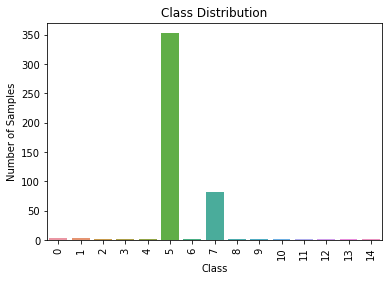

<Figure size 432x288 with 0 Axes>

In [0]:
#shows a histogram of class distribution
sns.countplot(x='Cluster',data=labeled)
plt.title('Class Distribution')
plt.xticks(rotation=90)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.figure()

In [0]:
label_list=list(cluster_labels)

In [0]:
label_count=[]#the number of each samples in each group
for i in cluster_labels.unique():
  label_count.append(label_list.count(i))


In [0]:
topk_group=cluster_labels.unique()

#this is just a list of all group numbers

The two functions below extract the top words that have the highest total word frequency or TFIDF. The calculation was done based on each individual group not the entire dataset.

In [0]:
def topk_words(group_num,k):#this function extract top k words based on total WF of word calculated from an individual group
  group_df=labeled_data[labeled_data.Cluster==group_num]
  vectorizer = CountVectorizer(analyzer="word")
  group_WF = vectorizer.fit_transform(list(group_df.clean_description)).toarray()
  group_feature=vectorizer.get_feature_names()
  resulted_data=feature_dataframe(group_WF,group_feature)
  total_frequency=dict(resulted_data.sum())
  sorted_frequency = sorted(total_frequency.items(), key=operator.itemgetter(1),reverse=True)
  return sorted_frequency[-k:]


In [0]:
def topk_words2(group_num,k):#this function extract top k words based on total TFIDF of word calculated from an individual group
  group_df=labeled_data[labeled_data.Cluster==group_num]
  vectorizer = TfidfVectorizer(analyzer='word',  use_idf=True, smooth_idf=True, norm=None)
  group_TFIDF = vectorizer.fit_transform(list(group_df.clean_description)).toarray()
  group_feature=vectorizer.get_feature_names()
  resulted_data=feature_dataframe(group_TFIDF,group_feature)
  total_frequency=dict(resulted_data.sum())
  sorted_frequency = sorted(total_frequency.items(), key=operator.itemgetter(1),reverse=True)
  return sorted_frequency[-k:]

In [0]:
#this dataset contains the cleaned course topic and group number for each sample
labeled_data=pd.concat([clean_df.clean_description,labeled.Cluster],axis=1)
labeled_data

,clean_description,Cluster
0,literacy digital methods dat imagery digital h...,5
1,literacy digital methods dat imagery digital h...,5
2,literacy digital methods dat imagery digital h...,5
3,grundlagen der wirtschaftsinformatik grundlage...,14
4,pflichtprogramme spezialkompetenz wirtschaftsi...,5
...,...,...
451,mapr stream mapr stream architecture producers...,5
452,apache spark inspect spark build spark applica...,7
453,familiar sql query structure familiar sql quer...,5
454,,5


In [0]:
#returns the top k words with highest word frequency
for i in topk_group:
  print('group',i,':',topk_words(i,20))

group 5 : [('visually', 1), ('vizualisation', 1), ('voice', 1), ('volumes', 1), ('webmining', 1), ('webscraping', 1), ('whilst', 1), ('wide', 1), ('wild', 1), ('willingness', 1), ('witch', 1), ('word', 1), ('workbook', 1), ('workflow', 1), ('workshops', 1), ('wrangle', 1), ('wrap', 1), ('writablecomparables', 1), ('wrong', 1), ('yield', 1)]
group 14 : [('bachelorarbeit', 1), ('betriebswirtschaftslehre', 1), ('englisch', 1), ('fachsprache', 1), ('formaler', 1), ('geschlechterspezifische', 1), ('hlte', 1), ('informatik', 1), ('knowledge', 1), ('mathematik', 1), ('methoden', 1), ('mit', 1), ('oder', 1), ('rechts', 1), ('software', 1), ('soziale', 1), ('spezialisierungsfach', 1), ('statistik', 1), ('wahlfach', 1), ('wirtschaftswissenschaften', 1)]
group 7 : [('uns', 1), ('user', 1), ('utilities', 1), ('validation', 1), ('valley', 1), ('valuation', 1), ('variability', 1), ('variants', 1), ('variation', 1), ('variety', 1), ('vectors', 1), ('videos', 1), ('view', 1), ('virtualized', 1), ('vis

In [0]:
#returns the top k words with highest TFIDF frequency
for i in topk_group:
  print('group',i,':',topk_words2(i,20))

group 5 : [('visually', 6.176149732573829), ('vizualisation', 6.176149732573829), ('voice', 6.176149732573829), ('volumes', 6.176149732573829), ('webmining', 6.176149732573829), ('webscraping', 6.176149732573829), ('whilst', 6.176149732573829), ('wide', 6.176149732573829), ('wild', 6.176149732573829), ('willingness', 6.176149732573829), ('witch', 6.176149732573829), ('word', 6.176149732573829), ('workbook', 6.176149732573829), ('workflow', 6.176149732573829), ('workshops', 6.176149732573829), ('wrangle', 6.176149732573829), ('wrap', 6.176149732573829), ('writablecomparables', 6.176149732573829), ('wrong', 6.176149732573829), ('yield', 6.176149732573829)]
group 14 : [('bachelorarbeit', 1.0), ('betriebswirtschaftslehre', 1.0), ('englisch', 1.0), ('fachsprache', 1.0), ('formaler', 1.0), ('geschlechterspezifische', 1.0), ('hlte', 1.0), ('informatik', 1.0), ('knowledge', 1.0), ('mathematik', 1.0), ('methoden', 1.0), ('mit', 1.0), ('oder', 1.0), ('rechts', 1.0), ('software', 1.0), ('soziale'

From the above, we can see for each group, the top 20 words with the highest word frequencies and TFIDF was selected. However, since the clustering was done by means of TFIDF, thus it makes more sense to use TFIDF again to obtain the top 20 words. The above is just a comparison between using word frequnency and TFIDF. In short, the results from TFIDF would be taken.

However, as you can from the above results, some of the key words might be ambiguous and unclear such as 'languages'. Thus, the results from k means classifier can only used as a reference for topic selection. In order to generate more precise topics, the team did research and summarize two lists of hard and soft skills that can be potentially used for the course topic of MIE1624. Therefore, we will pick the topics from the list below based on the key words from the classifier. For instance, from group 12, the word 'deep' liekly refers to deep learning or neural networks, thus, the topic 'Neural Networks' should be selected.

In [0]:
skills_hard = ['Excel','Python','R','Java','Scala','C/C++', 'MATLAB','SAS','SQL/databases','Oracle','SPSS','Machine Learning','Data Mining/Analytics','NLP','Visualisation',
        'Big Data','AWS/Google Cloud','Probability','Support Vector Machines','Neural Networks','JSON','Azure','Algebra','Statistics','Operations research','DevOps',
        'Git']

skills_soft = ['Presentation' ,'agile','SDLC' ,'Decision making','problem solving','Team building','Project management','Leadership','Consulting','Passion','Research']

In [0]:
skills_soft

['Presentation',
 'agile',
 'SDLC',
 'Decision making',
 'problem solving',
 'Team building',
 'Project management',
 'Leadership',
 'Consulting',
 'Passion',
 'Research']

Based on group 5, **'Visualization'** was selected.\
Based on group 14, **'Statistics' and 'Probability'** were selected.\
Based on group 7, **'Algebra' and 'Machine Learning'** were selected.\
Based on group 2, **'Data Mining/Analytics' and 'Machine Learning'** were selected.\
Based on group 12, **'Big Data', Neural Networks' and 'Machine Learning'** were selcted.\
Based on group 3, **'Machine Learning', 'Data Mining/Analytics'** were selected.\
Based on group 0, **'Big Data',' Data Mining/Analytics'** were selected.\
Based on group 6, **'NLP' and 'Big Data'** were selected.\
Based on group 8, **'Data Mining/Analytics'** were selected.\
Based on group 9, **'Json' and 'Big Data'** were selected.\
Based on group 11, **'Python','Data Mining/Analytics' and 'Probability'** were selected.\
Based on group 10, **'NLP' and 'SQL/Databases'** were selected.\
Based on group 4, **'AWS/Google Cloud' and 'Big Data'** were selected.\
Based on group 1, **'Big Data' and 'Data Mining/Analylitics'** were selected.\
Based on group 13, **'project management', 'problem solving'** were selected.

From all the above, the topics selected so far are: **'Visualization', 'Statistics', 'Probability','Algebra', 'Machine Learning', 'Data Mining Analytics', 'Big Data', 'Neural Networks','NLP', 'Json', 'Python', 'SQL/Databases', 'AWS/Google Cloud', 'project management' and 'problem solving'** were selected.

# 5.0 Kaggle Survey Dataset Analysis


The below shows a list of questions from kaggle survey 2019 about jobs related to data science.In general, this is the second dataset that the team used.

In [0]:
questions = pd.read_csv('questions_only.csv')
Q = questions.T
Q.columns=['question']
Q

,question
Time from Start to Finish (seconds),Duration (in seconds)
Q1,What is your age (# years)?
Q2,What is your gender? - Selected Choice
Q3,In which country do you currently reside?
Q4,What is the highest level of formal education ...
Q5,Select the title most similar to your current ...
Q6,What is the size of the company where you are ...
Q7,Approximately how many individuals are respons...
Q8,Does your current employer incorporate machine...
Q9,Select any activities that make up an importan...


The below shows the entire dataset on the resposes to the survey questions.

In [0]:
response = pd.read_csv('Kaggle_Salary.csv',low_memory=False)
response.head()

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_OTHER_TEXT,Q10,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q12_OTHER_TEXT,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,...,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q32_OTHER_TEXT,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q33_OTHER_TEXT,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT,Q10_Encoded,Q10_buckets
0,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,I do not know,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,"30,000-39,999",$0 (USD),Twitter (data science influencers),NaN,NaN,"Kaggle (forums, blog, social media, etc)",NaN,NaN,NaN,"Blogs (Towards Data Science, Medium, Analytics...",Journal Publications (traditional publications...,NaN,NaN,NaN,-1,NaN,Coursera,NaN,DataCamp,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,3,"30,000-39,999"
1,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,"We have well established ML methods (i.e., mod...",Analyze and understand data to influence produ...,Build and/or run the data infrastructure that ...,Build prototypes to explore applying machine l...,Build and/or run a machine learning service th...,NaN,NaN,NaN,NaN,-1,"5,000-7,499","> $100,000 ($USD)",NaN,NaN,NaN,"Kaggle (forums, blog, social media, etc)",NaN,"YouTube (Cloud AI Adventures, Siraj Raval, etc)","Podcasts (Chai Time Data Science, Linear Digre...","Blogs (Towards Data Science, Medium, Analytics...",NaN,NaN,NaN,NaN,-1,NaN,Coursera,NaN,DataCamp,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0,"0-9,999"
2,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,I do not know,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,"250,000-299,999","$10,000-$99,999",NaN,NaN,NaN,NaN,NaN,NaN,"Podcasts (Chai Time Data Science, Linear Digre...","Blogs (Towards Data Science, Medium, Analytics...",Journal Publications (traditional publications...,"Slack Communities (ods.ai, kagglenoobs, etc)",NaN,NaN,-1,NaN,Coursera,edX,DataCamp,NaN,...,NaN,Azure Machine Learning Studio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1,14,">250,000"
3,392,22-24,Male,-1,India,Bachelor’s degree,Other,1,0-49 employees,0,No (we do not use ML methods),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,"4,000-4,999",$0 (USD),NaN,NaN,NaN,NaN,NaN,"YouTube (Cloud AI Adventures, Siraj Raval, etc)",NaN,"Blogs (Towards Data Science, Medium, Analytics...",NaN,NaN,NaN,Other,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0,"0-9,999"
4,470,50-54,Male,-1,France,Master’s degree,Data Scientist,-1,0-49 employees,3-4,"We have well established ML methods (i.e., mod...",NaN,NaN,Build prototypes to explore applying machine l...,NaN,NaN,Do research that advances the state of the art...,NaN,NaN,-1,"60,000-69,999","$10,000-$99,999",NaN,NaN,NaN,NaN,NaN,"YouTube (Cloud AI Adventures, Siraj Raval, etc)",NaN,"Blogs (Towards Data Science, Medium, Analytics...",Journal Publications (traditional publications...,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,RapidMiner,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,Auto-Keras,NaN,NaN,NaN,Na

Here, we selected the salary threshold value to be 70000 since we are looking for the answers associated to the medium to high salary positions.

In [0]:
high_salary_response=response[response.Q10_Encoded>=7]
high_salary_response

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_OTHER_TEXT,Q10,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q12_OTHER_TEXT,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,...,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q32_OTHER_TEXT,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q33_OTHER_TEXT,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT,Q10_Encoded,Q10_buckets
2,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,I do not know,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,"250,000-299,999","$10,000-$99,999",NaN,NaN,NaN,NaN,NaN,NaN,"Podcasts (Chai Time Data Science, Linear Digre...","Blogs (Towards Data Science, Medium, Analytics...",Journal Publications (traditional publications...,"Slack Communities (ods.ai, kagglenoobs, etc)",NaN,NaN,-1,NaN,Coursera,edX,DataCamp,NaN,...,NaN,Azure Machine Learning Studio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1,14,">250,000"
6,624,22-24,Female,-1,United States of America,Bachelor’s degree,Data Scientist,-1,"> 10,000 employees",20+,"We recently started using ML methods (i.e., mo...",Analyze and understand data to influence produ...,NaN,Build prototypes to explore applying machine l...,Build and/or run a machine learning service th...,NaN,NaN,NaN,NaN,-1,"80,000-89,999",$0 (USD),NaN,Hacker News (https://news.ycombinator.com/),NaN,NaN,NaN,NaN,NaN,"Blogs (Towards Data Science, Medium, Analytics...",Journal Publications (traditional publications...,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,8,"80,000-89,999"
9,397,30-34,Male,-1,Germany,Bachelor’s degree,Data Scientist,-1,50-249 employees,5-9,"We recently started using ML methods (i.e., mo...",Analyze and understand data to influence produ...,Build and/or run the data infrastructure that ...,Build prototypes to explore applying machine l...,Build and/or run a machine learning service th...,NaN,NaN,NaN,NaN,-1,"70,000-79,999","$1000-$9,999",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,-1,NaN,NaN,edX,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,-1,NaN,PostgresSQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,7,"70,000-79,999"
10,372,30-34,Male,-1,United States of America,Master’s degree,Product/Project Manager,-1,"> 10,000 employees",20+,I do not know,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,"90,000-99,999",$0 (USD),NaN,Hacker News (https://news.ycombinator.com/),"Reddit (r/machinelearning, r/datascience, etc)","Kaggle (forums, blog, social media, etc)",NaN,NaN,NaN,"Blogs (Towards Data Science, Medium, Analytics...",NaN,NaN,NaN,NaN,-1,Udacity,Coursera,NaN,NaN,DataQuest,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,9,"90,000-99,999"
11,485,50-54,Female,-1,United States of America,Master’s degree,Data Analyst,-1,50-249 employees,1-2,We use ML methods for generating insights (but...,Analyze and understand data to influence produ...,Build and/or run the data infrastructure that ...,NaN,NaN,NaN,NaN,NaN,NaN,-1,"125,000-149,999","> $100,000 ($USD)",NaN,NaN,NaN,"Kaggle (forums, blog, social media, etc)",NaN,"YouTube (Cloud AI Adventures, Siraj Raval, etc)","Podcasts (Chai Time Data Science, Linear Digre...","Blogs (Towards Data Science, 

This function is designed to extract the top two columns that have the highest values of summation which means these options were selected by the most of respondents since each column is corresponding to one alternative from a multiple choice question. 

In [0]:
def highest_freq_cols(QResponse_df):
  sum_list=list(QResponse_df.sum( axis=0))
  sum_data=pd.DataFrame(np.array(sum_list),index=QResponse_df.columns)
  sum_data=sum_data.sort_values(by=[0], axis=0, ascending=False)
  #return pd.DataFrame(QResponse_df.iloc[:,sum_list.index(max(sum_list))]).columns
  return list(sum_data.iloc[0:2,0].index)
  


This function is to binary encode the values in each column with 1 which represents the selection of the alternative and 0 being the alternative is not slected. 

In [0]:
def encoder(column_list):
  Q=high_salary_response.loc[:,column_list]
  for i in column_list:
    Q[i] = Q[i].astype('category')
    Q[i] = Q[i].cat.codes
  Q=Q.replace(to_replace=[0,-1], value=[1,0], inplace=False, limit=None, regex=False, method='pad')
  return Q

In [0]:
Q_selected=Q.iloc[[18,20,24,25,27,28,32,33,34],:]


The above is a list of releveant questions that were selected. The answers for these questions can help us to find the appropriate topics for the MIE1624 course design. 

Now, I extracted the answers for each selected question and the alternative that are selected the most was recoginized as potential topics that can be included in the syllabus of MIE1624.

## **Q18**

**Question: What programming languages do you use on a regular basis?**

In [0]:
Q18_columns=['Q18_Part_1','Q18_Part_2','Q18_Part_3','Q18_Part_4','Q18_Part_5','Q18_Part_6','Q18_Part_7','Q18_Part_8','Q18_Part_9','Q18_Part_10','Q18_Part_11','Q18_Part_12']

In [0]:
#binary encode the data(1=selected, 0=not selected)
Q18=encoder(Q18_columns)
Q18

,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_Part_7,Q18_Part_8,Q18_Part_9,Q18_Part_10,Q18_Part_11,Q18_Part_12
2,1,1,1,0,0,0,0,0,1,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,0,0
10,1,0,0,0,0,0,0,0,0,0,0,0
11,1,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
12439,0,0,0,0,0,0,0,0,0,0,0,0
12451,0,0,0,0,0,0,0,0,0,0,0,0
12456,0,0,0,0,0,0,0,0,0,0,0,0
12459,1,0,0,0,0,0,0,0,0,0,0,0


In [0]:
#generate the column names of the column that has the highest summations
Q18h=highest_freq_cols(Q18)
print("The selected columns are",Q18h[0],'and',Q18h[1])

The selected columns are Q18_Part_1 and Q18_Part_3


The most frequenctly selected answer for Q18 is **Python and SQL**.

## **Q20**

**Question: What data visualization libraries or tools do you use on a regular basis?** 

In [0]:
#binary encode the data(1=selected, 0=not selected)
Q20_columns=['Q20_Part_1','Q20_Part_2','Q20_Part_3','Q20_Part_4','Q20_Part_5','Q20_Part_6','Q20_Part_7','Q20_Part_8','Q20_Part_9','Q20_Part_10','Q20_Part_11','Q20_Part_12']
Q20=encoder(Q20_columns)
Q20

,Q20_Part_1,Q20_Part_2,Q20_Part_3,Q20_Part_4,Q20_Part_5,Q20_Part_6,Q20_Part_7,Q20_Part_8,Q20_Part_9,Q20_Part_10,Q20_Part_11,Q20_Part_12
2,1,1,0,0,0,0,0,1,0,0,0,0
6,0,1,0,0,0,1,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,0,0
10,0,1,0,0,0,1,0,1,0,0,0,0
11,1,1,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
12439,0,0,0,0,0,0,0,0,0,0,0,0
12451,0,0,0,0,0,0,0,0,0,0,0,0
12456,0,0,0,0,0,0,0,0,0,0,0,0
12459,0,0,0,0,0,0,0,0,0,0,1,0


In [0]:
#generate the column names of the column that has the highesy summations
Q20h=highest_freq_cols(Q20)
print("The selected columns are",Q20h[0],'and',Q20h[1])

The selected columns are Q20_Part_2 and Q20_Part_8


The most frequenctly selected answer for Q20 is  **Matplotlib and Seaborn**.

## **Q24**

**Question: Which of the following ML algorithms do you use on a regular basis?**

In [0]:
Q24_columns=['Q24_Part_1','Q24_Part_2','Q24_Part_3','Q24_Part_4','Q24_Part_5','Q24_Part_6','Q24_Part_7','Q24_Part_8','Q24_Part_9','Q24_Part_10','Q24_Part_11','Q24_Part_12']
Q24=encoder(Q24_columns)
Q24

,Q24_Part_1,Q24_Part_2,Q24_Part_3,Q24_Part_4,Q24_Part_5,Q24_Part_6,Q24_Part_7,Q24_Part_8,Q24_Part_9,Q24_Part_10,Q24_Part_11,Q24_Part_12
2,1,0,0,0,0,0,1,0,0,0,0,0
6,1,1,0,0,0,0,1,0,0,0,0,0
9,1,1,1,1,0,1,0,0,0,0,0,0
10,1,1,0,1,0,0,0,0,0,0,0,0
11,1,1,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
12439,0,0,0,0,0,0,0,0,0,0,0,0
12451,0,0,0,0,0,0,0,0,0,0,0,0
12456,0,0,0,0,0,0,0,0,0,0,0,0
12459,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
#generate the column names of the column that has the highesy summations
Q24h=highest_freq_cols(Q24)
print("The selected columns are",Q24h[0],'and',Q24h[1])

The selected columns are Q24_Part_1 and Q24_Part_2


The most frequently selected answers is **linear and logistic regression as well as decision tree and random forest**.

## **Q25**

**Question: Which categories of ML tools do you use on a regular basis?**

In [0]:
Q25_columns=['Q25_Part_1','Q25_Part_2','Q25_Part_3','Q25_Part_4','Q25_Part_5','Q25_Part_6','Q25_Part_7','Q25_Part_8']
Q25=encoder(Q25_columns)
Q25

,Q25_Part_1,Q25_Part_2,Q25_Part_3,Q25_Part_4,Q25_Part_5,Q25_Part_6,Q25_Part_7,Q25_Part_8
2,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,1,0
9,0,0,0,0,0,0,1,0
10,0,0,0,0,0,0,1,0
11,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
12439,0,0,0,0,0,0,0,0
12451,0,0,0,0,0,0,0,0
12456,0,0,0,0,0,0,0,0
12459,0,0,0,0,0,0,0,0


In [0]:
#generate the column names of the column that has the highest summations
Q25h=highest_freq_cols(Q25)
print("The selected columns are",Q25h[0],'and',Q25h[1])

The selected columns are Q25_Part_7 and Q25_Part_3


The most frequently selected answers are **none and Automated model selection (e.g. auto-sklearn, xcessiv)**.

## **Q27**

**Question: Which of the following natural language processing (NLP) methods do you use on a regular basis?**

In [0]:
Q27_columns=['Q27_Part_1','Q27_Part_2','Q27_Part_3','Q27_Part_4','Q27_Part_5','Q27_Part_6']
Q27=encoder(Q27_columns)
Q27

,Q27_Part_1,Q27_Part_2,Q27_Part_3,Q27_Part_4,Q27_Part_5,Q27_Part_6
2,0,0,0,0,0,0
6,0,0,0,0,0,0
9,0,0,0,0,0,0
10,0,0,0,0,0,0
11,0,0,0,0,0,0
...,...,...,...,...,...,...
12439,0,0,0,0,0,0
12451,0,0,0,0,0,0
12456,0,0,0,0,0,0
12459,0,0,0,0,0,0


In [0]:
#generate the column names of the column that has the highest summations
Q27h=highest_freq_cols(Q27)
print("The selected columns are",Q27h[0],'and',Q27h[1])

The selected columns are Q27_Part_1 and Q27_Part_4


The most frequently selected answers are **Word embeddings/vectors (GLoVe, fastText, word2vec) and Transformer language models (GPT-2, BERT, XLnet, etc)**.

## **Q28**

**Question: Which of the following machine learning frameworks do you use on a regular basis?**

In [0]:
Q28_columns=['Q28_Part_1','Q28_Part_2','Q28_Part_3','Q28_Part_4','Q28_Part_5','Q28_Part_6']
Q28=encoder(Q28_columns)
Q28

,Q28_Part_1,Q28_Part_2,Q28_Part_3,Q28_Part_4,Q28_Part_5,Q28_Part_6
2,1,1,1,1,0,0
6,1,1,1,0,0,0
9,0,0,1,0,0,0
10,1,0,0,1,0,0
11,1,0,0,0,0,0
...,...,...,...,...,...,...
12439,0,0,0,0,0,0
12451,0,0,0,0,0,0
12456,0,0,0,0,0,0
12459,0,0,0,0,0,0


In [0]:
#generate the column names of the column that has the highest summations
Q28h=highest_freq_cols(Q28)
print("The selected columns are",Q28h[0],'and',Q28h[1])

The selected columns are Q28_Part_1 and Q28_Part_2


The most frequently selected answers are **Scikit-learn and TensorFlow** .

## **Q32**

**Question: Which of the following machine learning products do you use on a regular basis?**

In [0]:
Q32_columns=['Q32_Part_1','Q32_Part_2','Q32_Part_3','Q32_Part_4','Q32_Part_5','Q32_Part_6','Q32_Part_7','Q32_Part_8','Q32_Part_9','Q32_Part_10','Q32_Part_11','Q32_Part_12']
Q32=encoder(Q32_columns)
Q32

,Q32_Part_1,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12
2,0,0,1,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,1,0
10,0,0,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
12439,0,0,0,0,0,0,0,0,0,0,0,0
12451,0,0,0,0,0,0,0,0,0,0,0,0
12456,0,0,0,0,0,0,0,0,0,0,0,0
12459,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
#generate the column names of the column that has the highest summations
Q32h=highest_freq_cols(Q32)
print("The selected columns are",Q32h[0],'and',Q32h[1])

The selected columns are Q32_Part_11 and Q32_Part_10


The most frequently selected answers are **none and Amazon SageMaker**.

## **Q33**

**Question: Which automated machine learning tools (or partial AutoML tools) do you use on a regular basis?**

In [0]:
Q33_columns=['Q33_Part_1','Q33_Part_2','Q33_Part_3','Q33_Part_4','Q33_Part_5','Q33_Part_6','Q33_Part_7','Q33_Part_8','Q33_Part_9','Q33_Part_10','Q33_Part_11','Q33_Part_12']
Q33=encoder(Q33_columns)
Q33

,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12
2,0,0,0,0,0,0,0,0,0,0,1,0
6,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,1,0
10,0,0,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
12439,0,0,0,0,0,0,0,0,0,0,0,0
12451,0,0,0,0,0,0,0,0,0,0,0,0
12456,0,0,0,0,0,0,0,0,0,0,0,0
12459,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
#generate the column names of the column that has the highest summations
Q33h=highest_freq_cols(Q33)
print("The selected columns are",Q33h[0],'and',Q33h[1])

The selected columns are Q33_Part_11 and Q33_Part_7


The most frequently selected answers are **none and Auto-Sklearn**.

## **Q34**

**Question：Which of the following relational database products do you use on a regular basis?**

In [0]:
Q34_columns=['Q34_Part_1','Q34_Part_2','Q34_Part_3','Q34_Part_4','Q34_Part_5','Q34_Part_6','Q34_Part_7','Q34_Part_8','Q34_Part_9','Q34_Part_10','Q34_Part_11','Q34_Part_12']
Q34=encoder(Q34_columns)
Q34

,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12
2,0,0,0,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,0,0
11,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
12439,0,0,0,0,0,0,0,0,0,0,0,0
12451,0,0,0,0,0,0,0,0,0,0,0,0
12456,0,0,0,0,0,0,0,0,0,0,0,0
12459,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
#generate the column names of the column that has the highest summations
Q34h=highest_freq_cols(Q34)
print("The selected columns are",Q34h[0],'and',Q34h[1])

The selected columns are Q34_Part_1 and Q34_Part_2


The most frequently selected answers are **mySQL and PostgresSQL**.

From the results of the above anaylsis, the key words(topics) revealed are **Python, SQL, Matplotlib, Seaborn,linear regression, logistic regression,Decision Tree, Random Forests, Automated model selection (e.g. auto-sklearn, xcessiv), Word embeddings/vectors (GLoVe, fastText, word2vec), Transformer language models (GPT-2, BERT, XLnet, etc), Scikit-learn, TensorFlow, Amazon SageMaker, Auto-Sklearn, mySQL and PostgresSQL**.

# 6.0 Course Topic Finalisation

The results from section 4.0 and 5.0 are **'Visualization', 'Statistics', 'Probability','Algebra', 'Machine Learning', 'Data Mining/Analytics', 'Big Data', 'Neural Networks','NLP', 'Json', 'Python', 'SQL/Databases', 'AWS/Google Cloud', 'project management' and 'problem solving', 'SQL', 'Matplotlib', 'Seaborn','linear regression', 'logistic regression', 'Decision trees', 'Random Forests', 'Automated model selection (e.g. auto-sklearn, xcessiv)', 'Word embeddings/vectors (GLoVe, fastText, word2vec)', 'Transformer language models (GPT-2, BERT, XLnet, etc)', 'Scikit-learn', 'TensorFlow', 'Amazon SageMaker', 'Auto-Sklearn', 'mySQL' and 'PostgresSQL'**. 

However, from observation, some of the narrower topics are already included in some of the broader ones such as 'Scikit-learn' and 'Python'. Thus, the topic selection should take this into account.  

So here is a list of finalized topics for MIE1624:\
**Introduction to Python:** from 'Seasborn', 'Python',Scikit-learn' and 'Matplotlib'\
**Statistics and Probability:** from 'Statistics' and 'Probability'\
**Linear Algebra Review:** from 'algebra'\
**Data Mining/analytics:** from 'Data Mining/Analytics'\
**Big Data:** from 'Big Data', 'SQL','mySQL','PostgresSQL' and 'SQL/Dataset'\
**Linear Regression:** from 'Linear Regression'\
**Logistic Regression:**  from 'Logistic Regression'\
**Decision Tree and Random Forests:** from 'Decision tree' and 'Random Forests'\
**Neural Networks:** from 'Neural Networks' and 'TensorFlow'\
**Natural Language Processing:** from 'NLP', ' Word embeddings/vectors (GLoVe, fastText, word2vec)' and 'Transformer language models (GPT-2, BERT, XLnet, etc)'\
**Automated Model Selection:** from 'Automated model selection (e.g. auto-sklearn, xcessiv)' and 'Auto-Sklearn'\
**Data Visualization:** from 'Visualization'\
**Introduction to Cloud Computing:** from 'AWS/Google Cloud'\
**Course Projects:** from 'Project management'and 'Problem Solving' 






Here is the completed course syllabus:

Module 1: Introduction to Data Science: Broadly introduces the field of data science such as what it is about and its application

Module 2: Introduction to Python: Introducing Python basics and how to use Python libraries and APIs inclduing Scikit-learn, Seasborn, Matplotlib 

Module 3: Statistics and Probability: reviewing the key concepts of statistics and probability such as probability density function.

Module 4: Review of Linear Algebra: reviewing the key concepts of linear algebra such as matrix manipulation

Module 5: Data Mining/analytics: introducing the key techniques of obtaning data such as web scrapping and exploratory data analysis.

Module 6: Linear Regression: introducing key concepts of linear regression and its optimization.

Module 7: Logistic Regression: introducing key concepts of logistic regression and its optimization.

Module 8: Decision Tree and Random Forests: introducing key concepts of decision tree and random forests models and their optimization.

Module 9: Neural Networks: introducing key concepts of neural network and Tensorflow. 

Module 10: Natural Language Processing: introducing how natural language processing is done including the use of word embedding and tranformer language models

Module 11: Automated Model Selection: introducing the how autmated model selection is done such as using auto-sklearn toolkit.

Module 12: Big Data: introducing the key concepts of big data such as SQL, Mapreduce, Hive. Also briefly cover mySQL and PostgresSQL.

Module 13: Introduction to Cloud Computing: covering the basic concepts of google cloud and AWS

Marking Scheme:\
Project1: 15%\
Midterm Exam: 30%\
Project2: 15%\
Final Exam: 40%